<a href="https://colab.research.google.com/github/alexrafkin/mnist_fashion_ANN/blob/main/ANNChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")
mnist = fetch_openml('Fashion-MNIST', version=1, cache=True)

After importing the data we can split it into testing and training sets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size = 1/7)
print(X_test.shape, y_test.shape)
print(X_train.shape, y_train.shape)

(10000, 784) (10000,)
(60000, 784) (60000,)


In [ ]:
input_dim = 784  # 28*28
output_dim = nb_classes = 10

X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
X_train.shape

(60000, 784)

Cleaning up the data a bit will be helpful for our future models. We also want to standardize the data to be between 0 and 1.

In [ ]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

This changes the target variable to categorical dummy variables which is our desired data type.

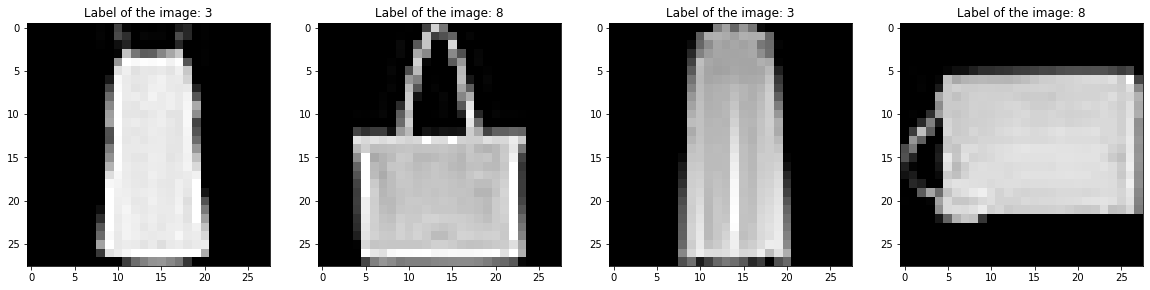

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))

plt.subplot(141)
plt.imshow(X_train[123].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[123]))

plt.subplot(142)
plt.imshow(X_train[124].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[124]))

plt.subplot(143)
plt.imshow(X_train[125].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[125]))

plt.subplot(144)
plt.imshow(X_train[126].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[126]))

plt.show()

Here we can see what some of these images look like before we begin developing models.

Lets remind ourselves what the labels are:
0.	T-shirt/top
1.	Trouser
2.	Pullover
3.	Dress
4.	Coat
5.	Sandal
6.	Shirt
7.	Sneaker
8.	Bag
9.	Ankle boot

# Try different ANN models and train them on your training set. You can play with the following:

* Number of layers: 3 vs 6
* Activation functions of the layers: tanh, sigmoid, relu
* Number of neurons in the layers: all high vs lower and div2
* Different batch sizes during training: 128 vs full batch

To track test performance, lets make a list of the test accuracies.

In [ ]:
test_acc = []

In [ ]:
train_acc = []

##3-layer, tanh

In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

model = Sequential()
# The first dense layer
model.add(Dense(1024, input_shape=(784,), activation="tanh"))
# The second dense layer
model.add(Dense(1024, input_shape=(784,), activation="tanh"))
# The last layer is the output layer
model.add(Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              803840    
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10250     
Total params: 1,863,690
Trainable params: 1,863,690
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
X_train.shape

NameError: ignored

In [ ]:
# Setting `verbose=1` prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 18s 38ms/step - loss: 1.0951 - accuracy: 0.6562
Epoch 2/20
469/469 [==============================] - 17s 36ms/step - loss: 0.5729 - accuracy: 0.8071
Epoch 3/20
469/469 [==============================] - 17s 35ms/step - loss: 0.5140 - accuracy: 0.8225
Epoch 4/20
469/469 [==============================] - 18s 37ms/step - loss: 0.4754 - accuracy: 0.8347
Epoch 5/20
469/469 [==============================] - 18s 38ms/step - loss: 0.4655 - accuracy: 0.8361
Epoch 6/20
469/469 [==============================] - 17s 36ms/step - loss: 0.4522 - accuracy: 0.8411
Epoch 7/20
469/469 [==============================] - 18s 39ms/step - loss: 0.4461 - accuracy: 0.8430
Epoch 8/20
469/469 [==============================] - 19s 40ms/step - loss: 0.4331 - accuracy: 0.8467
Epoch 9/20
469/469 [==============================] - 19s 40ms/step - loss: 0.4270 - accuracy: 0.8480
Epoch 10/20
469/469 [==============================] - 18s 38ms/step - loss: 0.413

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
train_score = model.evaluate(X_train, Y_train, verbose=0)
train_acc.append(train_score[1])
test_acc.append(score[1])
print('Test accuracy:', score[1])

Test accuracy: 0.8641999959945679


We can see that the training score and test score are really close, not having many concerns about overfitting here.

In [ ]:
model = Sequential()
# The first dense layer
model.add(Dense(1024, input_shape=(784,), activation="tanh"))
# The second dense layer
model.add(Dense(1024, input_shape=(784,), activation="tanh"))
# The last layer is the output layer
model.add(Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                10250     
Total params: 1,863,690
Trainable params: 1,863,690
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Setting `verbose=1` prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=60000, epochs=20, verbose=1)

Epoch 1/20
1/1 [==============================] - 11s 11s/step - loss: 2.4341 - accuracy: 0.0865
Epoch 2/20
1/1 [==============================] - 10s 10s/step - loss: 2.3383 - accuracy: 0.1226
Epoch 3/20
1/1 [==============================] - 10s 10s/step - loss: 2.2598 - accuracy: 0.1695
Epoch 4/20
1/1 [==============================] - 10s 10s/step - loss: 2.1909 - accuracy: 0.2151
Epoch 5/20
1/1 [==============================] - 10s 10s/step - loss: 2.1284 - accuracy: 0.2562
Epoch 6/20
1/1 [==============================] - 10s 10s/step - loss: 2.0706 - accuracy: 0.2956
Epoch 7/20
1/1 [==============================] - 10s 10s/step - loss: 2.0165 - accuracy: 0.3330
Epoch 8/20
1/1 [==============================] - 10s 10s/step - loss: 1.9658 - accuracy: 0.3695
Epoch 9/20
1/1 [==============================] - 10s 10s/step - loss: 1.9180 - accuracy: 0.4069
Epoch 10/20
1/1 [==============================] - 10s 10s/step - loss: 1.8730 - accuracy: 0.4428
Epoch 11/20
1/1 [============

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
train_score = model.evaluate(X_train, Y_train, verbose=0)
train_acc.append(train_score[1])
test_acc.append(score[1])
print('Test accuracy:', score[1])

Test accuracy: 0.6074000000953674


We can see that the training score and test score are really close, not having many concerns about overfitting here. However, this is way lower than our initial model.

In [ ]:
model = Sequential()
# The first dense layer
model.add(Dense(64, input_shape=(784,), activation="tanh"))
# The second dense layer
model.add(Dense(32, input_shape=(784,), activation="tanh"))
# The last layer is the output layer
model.add(Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Setting `verbose=1` prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 1.5247 - accuracy: 0.5313
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.7726 - accuracy: 0.7570
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.6360 - accuracy: 0.7927
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.5717 - accuracy: 0.8111
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.5311 - accuracy: 0.8225
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.5107 - accuracy: 0.8276
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4886 - accuracy: 0.8316
Epoch 8/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4691 - accuracy: 0.8376
Epoch 9/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4608 - accuracy: 0.8391
Epoch 10/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4485 - accuracy: 0.8448

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
train_score = model.evaluate(X_train, Y_train, verbose=0)
train_acc.append(train_score[1])
test_acc.append(score[1])
print('Test accuracy:', score[1])

Test accuracy: 0.8637999892234802


We can see that the training score and test score are really close, not having many concerns about overfitting here.

In [ ]:
model = Sequential()
# The first dense layer
model.add(Dense(64, input_shape=(784,), activation="tanh"))
# The second dense layer
model.add(Dense(32, input_shape=(784,), activation="tanh"))
# The last layer is the output layer
model.add(Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Setting `verbose=1` prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=60000, epochs=20, verbose=1)

Epoch 1/20
1/1 [==============================] - 1s 940ms/step - loss: 2.4767 - accuracy: 0.0678
Epoch 2/20
1/1 [==============================] - 0s 397ms/step - loss: 2.4003 - accuracy: 0.1010
Epoch 3/20
1/1 [==============================] - 0s 376ms/step - loss: 2.3442 - accuracy: 0.1258
Epoch 4/20
1/1 [==============================] - 0s 390ms/step - loss: 2.3014 - accuracy: 0.1395
Epoch 5/20
1/1 [==============================] - 0s 414ms/step - loss: 2.2671 - accuracy: 0.1504
Epoch 6/20
1/1 [==============================] - 0s 376ms/step - loss: 2.2381 - accuracy: 0.1598
Epoch 7/20
1/1 [==============================] - 0s 384ms/step - loss: 2.2127 - accuracy: 0.1709
Epoch 8/20
1/1 [==============================] - 0s 399ms/step - loss: 2.1895 - accuracy: 0.1824
Epoch 9/20
1/1 [==============================] - 0s 362ms/step - loss: 2.1681 - accuracy: 0.1950
Epoch 10/20
1/1 [==============================] - 0s 390ms/step - loss: 2.1478 - accuracy: 0.2092
Epoch 11/20
1/1 [==

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
train_score = model.evaluate(X_train, Y_train, verbose=0)
train_acc.append(train_score[1])
test_acc.append(score[1])
print('Test accuracy:', score[1])

Test accuracy: 0.3702999949455261


We can see that the training score and test score are really close, not having many concerns about overfitting here. This model is super inaccurate, we wont be using it.

## 3-layer, sigmoid

In [ ]:
model = Sequential()
# The first dense layer
model.add(Dense(1024, input_shape=(784,), activation="sigmoid"))
# The second dense layer
model.add(Dense(1024, input_shape=(784,), activation="sigmoid"))
# The last layer is the output layer
model.add(Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_13 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_14 (Dense)             (None, 10)                10250     
Total params: 1,863,690
Trainable params: 1,863,690
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Setting `verbose=1` prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 17s 36ms/step - loss: 2.2552 - accuracy: 0.2072
Epoch 2/20
469/469 [==============================] - 17s 36ms/step - loss: 2.0050 - accuracy: 0.4983
Epoch 3/20
469/469 [==============================] - 17s 37ms/step - loss: 1.6596 - accuracy: 0.5902
Epoch 4/20
469/469 [==============================] - 17s 37ms/step - loss: 1.3599 - accuracy: 0.6356
Epoch 5/20
469/469 [==============================] - 17s 36ms/step - loss: 1.1721 - accuracy: 0.6641
Epoch 6/20
469/469 [==============================] - 17s 35ms/step - loss: 1.0517 - accuracy: 0.6878
Epoch 7/20
469/469 [==============================] - 17s 36ms/step - loss: 0.9627 - accuracy: 0.7023
Epoch 8/20
469/469 [==============================] - 17s 37ms/step - loss: 0.8984 - accuracy: 0.7137
Epoch 9/20
469/469 [==============================] - 18s 38ms/step - loss: 0.8502 - accuracy: 0.7199
Epoch 10/20
469/469 [==============================] - 17s 37ms/step - loss: 0.810

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
train_score = model.evaluate(X_train, Y_train, verbose=0)
train_acc.append(train_score[1])
test_acc.append(score[1])
print('Test accuracy:', score[1])

Test accuracy: 0.7699999809265137


We can see that the training score and test score are really close, not having many concerns about overfitting here. However, this is pretty innacurate compared to the tanh model.

In [ ]:
model = Sequential()
# The first dense layer
model.add(Dense(1024, input_shape=(784,), activation="sigmoid"))
# The second dense layer
model.add(Dense(1024, input_shape=(784,), activation="sigmoid"))
# The last layer is the output layer
model.add(Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_16 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_17 (Dense)             (None, 10)                10250     
Total params: 1,863,690
Trainable params: 1,863,690
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Setting `verbose=1` prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=60000, epochs=20, verbose=1)

Epoch 1/20
1/1 [==============================] - 10s 10s/step - loss: 2.4577 - accuracy: 0.1001
Epoch 2/20
1/1 [==============================] - 10s 10s/step - loss: 2.3861 - accuracy: 0.1001
Epoch 3/20
1/1 [==============================] - 10s 10s/step - loss: 2.3462 - accuracy: 0.1003
Epoch 4/20
1/1 [==============================] - 10s 10s/step - loss: 2.3240 - accuracy: 0.1107
Epoch 5/20
1/1 [==============================] - 10s 10s/step - loss: 2.3120 - accuracy: 0.1311
Epoch 6/20
1/1 [==============================] - 9s 9s/step - loss: 2.3055 - accuracy: 0.1430
Epoch 7/20
1/1 [==============================] - 10s 10s/step - loss: 2.3020 - accuracy: 0.1517
Epoch 8/20
1/1 [==============================] - 10s 10s/step - loss: 2.3000 - accuracy: 0.1694
Epoch 9/20
1/1 [==============================] - 10s 10s/step - loss: 2.2987 - accuracy: 0.1950
Epoch 10/20
1/1 [==============================] - 10s 10s/step - loss: 2.2979 - accuracy: 0.2095
Epoch 11/20
1/1 [==============

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
train_score = model.evaluate(X_train, Y_train, verbose=0)
train_acc.append(train_score[1])
test_acc.append(score[1])
print('Test accuracy:', score[1])

Test accuracy: 0.19110000133514404


We can see that the training score and test score are really close, not having many concerns about overfitting here. Not using this model, super inaccurate.

In [ ]:
model = Sequential()
# The first dense layer
model.add(Dense(64, input_shape=(784,), activation="sigmoid"))
# The second dense layer
model.add(Dense(32, input_shape=(784,), activation="sigmoid"))
# The last layer is the output layer
model.add(Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_19 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_20 (Dense)             (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Setting `verbose=1` prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 2.3468 - accuracy: 0.1957
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 2.2007 - accuracy: 0.4529
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 2.0859 - accuracy: 0.4758
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 1.9231 - accuracy: 0.5042
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 1.7495 - accuracy: 0.5651
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 1.5967 - accuracy: 0.5814
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 1.4747 - accuracy: 0.5970
Epoch 8/20
469/469 [==============================] - 1s 3ms/step - loss: 1.3789 - accuracy: 0.6081
Epoch 9/20
469/469 [==============================] - 1s 2ms/step - loss: 1.2956 - accuracy: 0.6217
Epoch 10/20
469/469 [==============================] - 1s 2ms/step - loss: 1.2276 - accuracy: 0.6303

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
train_score = model.evaluate(X_train, Y_train, verbose=0)
train_acc.append(train_score[1])
test_acc.append(score[1])
print('Test accuracy:', score[1])

Test accuracy: 0.7231000065803528


We can see that the training score and test score are really close, not having many concerns about overfitting here. It seems like sigmoid is consistently less accurate than tanh.

In [ ]:
model = Sequential()
# The first dense layer
model.add(Dense(64, input_shape=(784,), activation="sigmoid"))
# The second dense layer
model.add(Dense(32, input_shape=(784,), activation="sigmoid"))
# The last layer is the output layer
model.add(Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_22 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_23 (Dense)             (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Setting `verbose=1` prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=60000, epochs=20, verbose=1)

Epoch 1/20
1/1 [==============================] - 1s 789ms/step - loss: 2.4648 - accuracy: 0.1000
Epoch 2/20
1/1 [==============================] - 0s 362ms/step - loss: 2.4603 - accuracy: 0.1000
Epoch 3/20
1/1 [==============================] - 0s 370ms/step - loss: 2.4560 - accuracy: 0.1000
Epoch 4/20
1/1 [==============================] - 0s 377ms/step - loss: 2.4518 - accuracy: 0.1000
Epoch 5/20
1/1 [==============================] - 0s 396ms/step - loss: 2.4477 - accuracy: 0.1000
Epoch 6/20
1/1 [==============================] - 0s 371ms/step - loss: 2.4437 - accuracy: 0.1000
Epoch 7/20
1/1 [==============================] - 0s 374ms/step - loss: 2.4399 - accuracy: 0.1000
Epoch 8/20
1/1 [==============================] - 0s 381ms/step - loss: 2.4361 - accuracy: 0.1000
Epoch 9/20
1/1 [==============================] - 0s 367ms/step - loss: 2.4325 - accuracy: 0.1000
Epoch 10/20
1/1 [==============================] - 0s 380ms/step - loss: 2.4290 - accuracy: 0.1000
Epoch 11/20
1/1 [==

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
train_score = model.evaluate(X_train, Y_train, verbose=0)
train_acc.append(train_score[1])
test_acc.append(score[1])
print('Test accuracy:', score[1])

Test accuracy: 0.10010000318288803


We can see that the training score and test score are really close, not having many concerns about overfitting here. Not using this model.

##3-layer, relu

In [ ]:
model = Sequential()
# The first dense layer
model.add(Dense(1024, input_shape=(784,), activation="relu"))
# The second dense layer
model.add(Dense(1024, input_shape=(784,), activation="relu"))
# The last layer is the output layer
model.add(Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_25 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_26 (Dense)             (None, 10)                10250     
Total params: 1,863,690
Trainable params: 1,863,690
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Setting `verbose=1` prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 17s 37ms/step - loss: 1.3269 - accuracy: 0.6068
Epoch 2/20
469/469 [==============================] - 17s 36ms/step - loss: 0.6386 - accuracy: 0.7929
Epoch 3/20
469/469 [==============================] - 17s 37ms/step - loss: 0.5469 - accuracy: 0.8219
Epoch 4/20
469/469 [==============================] - 17s 37ms/step - loss: 0.5014 - accuracy: 0.8307
Epoch 5/20
469/469 [==============================] - 18s 37ms/step - loss: 0.4733 - accuracy: 0.8388
Epoch 6/20
469/469 [==============================] - 18s 37ms/step - loss: 0.4559 - accuracy: 0.8446
Epoch 7/20
469/469 [==============================] - 18s 38ms/step - loss: 0.4412 - accuracy: 0.8461
Epoch 8/20
469/469 [==============================] - 19s 40ms/step - loss: 0.4259 - accuracy: 0.8524
Epoch 9/20
469/469 [==============================] - 17s 37ms/step - loss: 0.4205 - accuracy: 0.8538
Epoch 10/20
469/469 [==============================] - 17s 36ms/step - loss: 0.406

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
train_score = model.evaluate(X_train, Y_train, verbose=0)
train_acc.append(train_score[1])
test_acc.append(score[1])
print('Test accuracy:', score[1])

Test accuracy: 0.8669999837875366


We can see that the training score and test score are really close, not having many concerns about overfitting here. This also looks like the most accurate model so far, promising for relu.

In [ ]:
model = Sequential()
# The first dense layer
model.add(Dense(1024, input_shape=(784,), activation="relu"))
# The second dense layer
model.add(Dense(1024, input_shape=(784,), activation="relu"))
# The last layer is the output layer
model.add(Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_28 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_29 (Dense)             (None, 10)                10250     
Total params: 1,863,690
Trainable params: 1,863,690
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Setting `verbose=1` prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=60000, epochs=20, verbose=1)

Epoch 1/20
1/1 [==============================] - 10s 10s/step - loss: 2.3425 - accuracy: 0.1553
Epoch 2/20
1/1 [==============================] - 10s 10s/step - loss: 2.3045 - accuracy: 0.1583
Epoch 3/20
1/1 [==============================] - 10s 10s/step - loss: 2.2700 - accuracy: 0.1633
Epoch 4/20
1/1 [==============================] - 10s 10s/step - loss: 2.2383 - accuracy: 0.1702
Epoch 5/20
1/1 [==============================] - 10s 10s/step - loss: 2.2088 - accuracy: 0.1824
Epoch 6/20
1/1 [==============================] - 10s 10s/step - loss: 2.1810 - accuracy: 0.2046
Epoch 7/20
1/1 [==============================] - 10s 10s/step - loss: 2.1547 - accuracy: 0.2366
Epoch 8/20
1/1 [==============================] - 10s 10s/step - loss: 2.1295 - accuracy: 0.2691
Epoch 9/20
1/1 [==============================] - 10s 10s/step - loss: 2.1054 - accuracy: 0.3002
Epoch 10/20
1/1 [==============================] - 10s 10s/step - loss: 2.0821 - accuracy: 0.3342
Epoch 11/20
1/1 [============

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
train_score = model.evaluate(X_train, Y_train, verbose=0)
train_acc.append(train_score[1])
test_acc.append(score[1])
print('Test accuracy:', score[1])

Test accuracy: 0.5936999917030334


Full batch size doesnt seem to be working well.

In [ ]:
model = Sequential()
# The first dense layer
model.add(Dense(64, input_shape=(784,), activation="relu"))
# The second dense layer
model.add(Dense(32, input_shape=(784,), activation="relu"))
# The last layer is the output layer
model.add(Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_31 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_32 (Dense)             (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Setting `verbose=1` prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 1.6811 - accuracy: 0.4821
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.7695 - accuracy: 0.7394
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.6366 - accuracy: 0.7823
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.5721 - accuracy: 0.8056
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.5336 - accuracy: 0.8137
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.5166 - accuracy: 0.8214
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4973 - accuracy: 0.8250
Epoch 8/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4823 - accuracy: 0.8333
Epoch 9/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4725 - accuracy: 0.8326
Epoch 10/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4665 - accuracy: 0.8358

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
train_score = model.evaluate(X_train, Y_train, verbose=0)
train_acc.append(train_score[1])
test_acc.append(score[1])
print('Test accuracy:', score[1])

Test accuracy: 0.8628000020980835


This model was super fast comparatively.

In [ ]:
model = Sequential()
# The first dense layer
model.add(Dense(64, input_shape=(784,), activation="relu"))
# The second dense layer
model.add(Dense(32, input_shape=(784,), activation="relu"))
# The last layer is the output layer
model.add(Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_34 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_35 (Dense)             (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Setting `verbose=1` prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=60000, epochs=20, verbose=1)

Epoch 1/20
1/1 [==============================] - 1s 816ms/step - loss: 2.3995 - accuracy: 0.0408
Epoch 2/20
1/1 [==============================] - 0s 374ms/step - loss: 2.3825 - accuracy: 0.0427
Epoch 3/20
1/1 [==============================] - 0s 377ms/step - loss: 2.3660 - accuracy: 0.0452
Epoch 4/20
1/1 [==============================] - 0s 388ms/step - loss: 2.3500 - accuracy: 0.0470
Epoch 5/20
1/1 [==============================] - 0s 382ms/step - loss: 2.3343 - accuracy: 0.0503
Epoch 6/20
1/1 [==============================] - 0s 391ms/step - loss: 2.3189 - accuracy: 0.0551
Epoch 7/20
1/1 [==============================] - 0s 403ms/step - loss: 2.3037 - accuracy: 0.0608
Epoch 8/20
1/1 [==============================] - 0s 384ms/step - loss: 2.2889 - accuracy: 0.0694
Epoch 9/20
1/1 [==============================] - 0s 384ms/step - loss: 2.2744 - accuracy: 0.0834
Epoch 10/20
1/1 [==============================] - 0s 376ms/step - loss: 2.2604 - accuracy: 0.1009
Epoch 11/20
1/1 [==

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
train_score = model.evaluate(X_train, Y_train, verbose=0)
train_acc.append(train_score[1])
test_acc.append(score[1])
print('Test accuracy:', score[1])

Test accuracy: 0.26759999990463257


Clearly sigmoid isn't performing well, and neither is using the full batch size. Let's reduce our options to relu and tanh, and have lower batch sizes.

---



#6-layer relu

In [ ]:
model = Sequential()
# The first dense layer
model.add(Dense(512, input_shape=(784,), activation="relu"))
# The second dense layer
model.add(Dense(256, input_shape=(784,), activation="relu"))
# The third dense layer
model.add(Dense(128, input_shape=(784,), activation="relu"))
# The fourth dense layer
model.add(Dense(64, input_shape=(784,), activation="relu"))
# The fifth dense layer
model.add(Dense(32, input_shape=(784,), activation="relu"))
# The last layer is the output layer
model.add(Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_37 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_38 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_39 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_40 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_41 (Dense)             (None, 10)                330       
Total params: 576,810
Trainable params: 576,810
Non-trainable params: 0
_______________________________________________

In [ ]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Setting `verbose=1` prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 9s 19ms/step - loss: 1.6350 - accuracy: 0.4796
Epoch 2/20
469/469 [==============================] - 9s 19ms/step - loss: 0.6531 - accuracy: 0.7783
Epoch 3/20
469/469 [==============================] - 9s 19ms/step - loss: 0.5480 - accuracy: 0.8094
Epoch 4/20
469/469 [==============================] - 9s 18ms/step - loss: 0.4943 - accuracy: 0.8270
Epoch 5/20
469/469 [==============================] - 8s 17ms/step - loss: 0.4573 - accuracy: 0.8408
Epoch 6/20
469/469 [==============================] - 8s 18ms/step - loss: 0.4381 - accuracy: 0.8473
Epoch 7/20
469/469 [==============================] - 8s 18ms/step - loss: 0.4210 - accuracy: 0.8518
Epoch 8/20
469/469 [==============================] - 8s 18ms/step - loss: 0.4078 - accuracy: 0.8567
Epoch 9/20
469/469 [==============================] - 9s 19ms/step - loss: 0.3939 - accuracy: 0.8604
Epoch 10/20
469/469 [==============================] - 8s 18ms/step - loss: 0.3792 - accura

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
train_score = model.evaluate(X_train, Y_train, verbose=0)
train_acc.append(train_score[1])
test_acc.append(score[1])
print('Test accuracy:', score[1])

Test accuracy: 0.8847000002861023


Most accurate test score so far, but beginning to see concerns of overfitting.

Now batch size of 16?

In [ ]:
model = Sequential()
# The first dense layer
model.add(Dense(512, input_shape=(784,), activation="relu"))
# The second dense layer
model.add(Dense(256, input_shape=(784,), activation="relu"))
# The third dense layer
model.add(Dense(128, input_shape=(784,), activation="relu"))
# The fourth dense layer
model.add(Dense(64, input_shape=(784,), activation="relu"))
# The fifth dense layer
model.add(Dense(32, input_shape=(784,), activation="relu"))
# The last layer is the output layer
model.add(Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_43 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_44 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_45 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_46 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_47 (Dense)             (None, 10)                330       
Total params: 576,810
Trainable params: 576,810
Non-trainable params: 0
_______________________________________________

In [ ]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Setting `verbose=1` prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=16, epochs=20, verbose=1)

Epoch 1/20
3750/3750 [==============================] - 33s 9ms/step - loss: 0.8913 - accuracy: 0.6939
Epoch 2/20
3750/3750 [==============================] - 33s 9ms/step - loss: 0.4200 - accuracy: 0.8484
Epoch 3/20
3750/3750 [==============================] - 28s 7ms/step - loss: 0.3684 - accuracy: 0.8657
Epoch 4/20
3750/3750 [==============================] - 35s 9ms/step - loss: 0.3400 - accuracy: 0.8741
Epoch 5/20
3750/3750 [==============================] - 35s 9ms/step - loss: 0.3149 - accuracy: 0.8822
Epoch 6/20
3750/3750 [==============================] - 33s 9ms/step - loss: 0.2996 - accuracy: 0.8896
Epoch 7/20
3750/3750 [==============================] - 33s 9ms/step - loss: 0.2845 - accuracy: 0.8947
Epoch 8/20
3750/3750 [==============================] - 33s 9ms/step - loss: 0.2718 - accuracy: 0.8986
Epoch 9/20
3750/3750 [==============================] - 32s 8ms/step - loss: 0.2568 - accuracy: 0.9034
Epoch 10/20
3750/3750 [==============================] - 36s 10ms/step - 

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
train_score = model.evaluate(X_train, Y_train, verbose=0)
train_acc.append(train_score[1])
test_acc.append(score[1])
print('Test accuracy:', score[1])

Test accuracy: 0.8899000287055969


By far the most accurate model so far, but worried about overfitting. The difference between training and testing scores arent huge, but something to be aware of.

## 6-layer tanh

In [ ]:
model = Sequential()
# The first dense layer
model.add(Dense(512, input_shape=(784,), activation="tanh"))
# The second dense layer
model.add(Dense(256, input_shape=(784,), activation="tanh"))
# The third dense layer
model.add(Dense(128, input_shape=(784,), activation="tanh"))
# The fourth dense layer
model.add(Dense(64, input_shape=(784,), activation="tanh"))
# The fifth dense layer
model.add(Dense(32, input_shape=(784,), activation="tanh"))
# The last layer is the output layer
model.add(Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_49 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_50 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_51 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_52 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_53 (Dense)             (None, 10)                330       
Total params: 576,810
Trainable params: 576,810
Non-trainable params: 0
_______________________________________________

In [ ]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Setting `verbose=1` prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 9s 18ms/step - loss: 1.3341 - accuracy: 0.6319
Epoch 2/20
469/469 [==============================] - 8s 18ms/step - loss: 0.6143 - accuracy: 0.8061
Epoch 3/20
469/469 [==============================] - 8s 17ms/step - loss: 0.5227 - accuracy: 0.8258
Epoch 4/20
469/469 [==============================] - 7s 16ms/step - loss: 0.4746 - accuracy: 0.8392
Epoch 5/20
469/469 [==============================] - 8s 17ms/step - loss: 0.4458 - accuracy: 0.8460
Epoch 6/20
469/469 [==============================] - 8s 17ms/step - loss: 0.4329 - accuracy: 0.8510
Epoch 7/20
469/469 [==============================] - 7s 16ms/step - loss: 0.4127 - accuracy: 0.8564
Epoch 8/20
469/469 [==============================] - 7s 16ms/step - loss: 0.4075 - accuracy: 0.8576
Epoch 9/20
469/469 [==============================] - 7s 16ms/step - loss: 0.3851 - accuracy: 0.8645
Epoch 10/20
469/469 [==============================] - 7s 15ms/step - loss: 0.3823 - accura

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
train_score = model.evaluate(X_train, Y_train, verbose=0)
train_acc.append(train_score[1])
test_acc.append(score[1])
print('Test accuracy:', score[1])

Test accuracy: 0.8755000233650208


This shows no sign of overfitting.

Now batch size of 16?

In [ ]:
model = Sequential()
# The first dense layer
model.add(Dense(512, input_shape=(784,), activation="tanh"))
# The second dense layer
model.add(Dense(256, input_shape=(784,), activation="tanh"))
# The third dense layer
model.add(Dense(128, input_shape=(784,), activation="tanh"))
# The fourth dense layer
model.add(Dense(64, input_shape=(784,), activation="tanh"))
# The fifth dense layer
model.add(Dense(32, input_shape=(784,), activation="tanh"))
# The last layer is the output layer
model.add(Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_55 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_56 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_57 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_58 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_59 (Dense)             (None, 10)                330       
Total params: 576,810
Trainable params: 576,810
Non-trainable params: 0
_______________________________________________

In [ ]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Setting `verbose=1` prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=16, epochs=20, verbose=1)

Epoch 1/20
3750/3750 [==============================] - 33s 9ms/step - loss: 0.7720 - accuracy: 0.7517
Epoch 2/20
3750/3750 [==============================] - 31s 8ms/step - loss: 0.4189 - accuracy: 0.8493
Epoch 3/20
3750/3750 [==============================] - 33s 9ms/step - loss: 0.3775 - accuracy: 0.8639
Epoch 4/20
3750/3750 [==============================] - 33s 9ms/step - loss: 0.3566 - accuracy: 0.8719
Epoch 5/20
3750/3750 [==============================] - 28s 7ms/step - loss: 0.3377 - accuracy: 0.8772
Epoch 6/20
3750/3750 [==============================] - 29s 8ms/step - loss: 0.3183 - accuracy: 0.8842
Epoch 7/20
3750/3750 [==============================] - 30s 8ms/step - loss: 0.3035 - accuracy: 0.8878
Epoch 8/20
3750/3750 [==============================] - 27s 7ms/step - loss: 0.2937 - accuracy: 0.8917
Epoch 9/20
3750/3750 [==============================] - 36s 10ms/step - loss: 0.2856 - accuracy: 0.8946
Epoch 10/20
3750/3750 [==============================] - 38s 10ms/step -

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
train_score = model.evaluate(X_train, Y_train, verbose=0)
train_acc.append(train_score[1])
test_acc.append(score[1])
print('Test accuracy:', score[1])

Test accuracy: 0.8960000276565552


Batch sizes of 16 seem to overfit a bit and take a really long time - it might be best to stick with the batch size of 128 which are still quite accurate and quick.

##Compare the results of each model. Which model performed best?

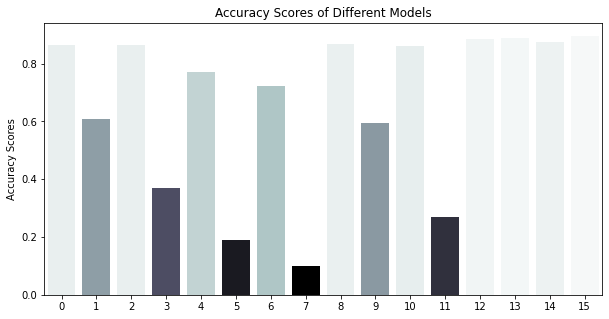

In [ ]:
test = pd.DataFrame(data=test_acc, columns=['Test Accuracy Score'])

vals = test['Test Accuracy Score']
norm = plt.Normalize(vals.min(), vals.max()+.025)
colors = plt.cm.bone(norm(vals))


plt.figure(figsize=(10,5))

ax = sns.barplot(y=test['Test Accuracy Score'], x=test.index, palette=colors)
plt.ylabel('Accuracy Scores')
plt.title('Accuracy Scores of Different Models')
plt.show()

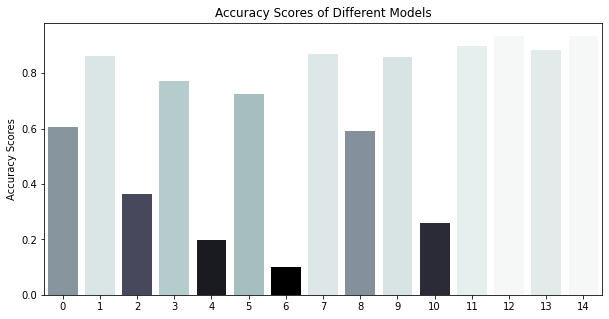

In [ ]:
train = pd.DataFrame(data=train_acc, columns=['Training Accuracy Score'])

vals = train['Training Accuracy Score']
norm = plt.Normalize(vals.min(), vals.max()+.025)
colors = plt.cm.bone(norm(vals))


plt.figure(figsize=(10,5))

ax = sns.barplot(y=train['Training Accuracy Score'], x=train.index, palette=colors)
plt.ylabel('Accuracy Scores')
plt.title('Accuracy Scores of Different Models')
plt.show()

After trying out a bunch of different options, I  found that the full batch size was quicker but innacurate, and sigmoid did a really poor job at identifying the images. Having really high neuron counts in each level didnt seem as useful as having decreasing neuron counts. Very low batch size kind of tended to overfit. 3-layer was a bit too simple for this dataset, and the 6-layer models tended to have better success in image recognition.

The six-layer relu or tanh models with descending neuron counts seem to be the best models, although there may be concerns of overfitting in the lower batch size models.

In [ ]:
final = test.copy()

In [ ]:
final['Training Accuracy Score'] = train_acc

In [ ]:
final['Overfitting Difference'] = (final['Training Accuracy Score'] - final['Test Accuracy Score'])/final['Training Accuracy Score']

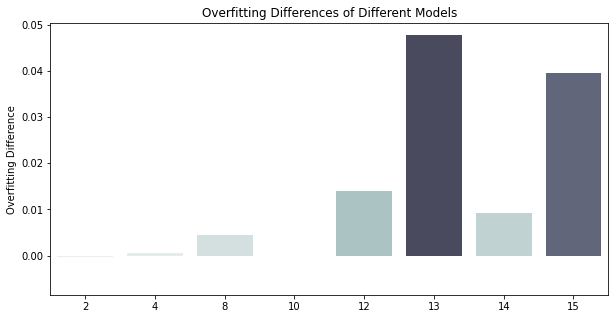

In [ ]:
vals = final['Overfitting Difference']
norm = plt.Normalize(vals.min(), vals.max()+.025)
colors = plt.cm.bone_r(norm(vals))


plt.figure(figsize=(10,5))

ax = sns.barplot(y=vals, x=final.index, palette=colors)
plt.ylabel('Overfitting Difference')
plt.title('Overfitting Differences of Different Models')
plt.show()

Looks like 12 and 14 are our best bets: That was the 6-layer relu and tanh models with batch size 128.

In [ ]:
for i in [1,3,5,6,7,9,11]:
  final = final.drop(i,axis=0)

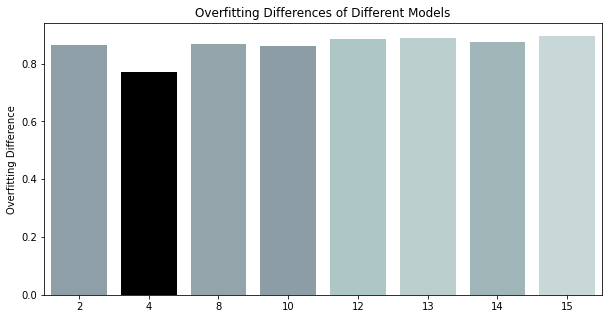

In [ ]:
vals = final['Test Accuracy Score']
norm = plt.Normalize(vals.min(), vals.max()+.025)
colors = plt.cm.bone(norm(vals))


plt.figure(figsize=(10,5))

ax = sns.barplot(y=vals, x=final.index, palette=colors)
plt.ylabel('Overfitting Difference')
plt.title('Overfitting Differences of Different Models')
plt.show()